In [1]:
import os
import sys
import matplotlib.pyplot as plt
import random
import argparse

import numpy as np
import pandas as pd
import torch

if os.path.abspath('..') not in sys.path:
    sys.path.insert(0, os.path.abspath('..'))

if os.path.abspath('../..') not in sys.path:
    sys.path.insert(0, os.path.abspath('../..'))
from Evaluate.evaluate import *

from utils.processing import crop
from utils.heatmap_generator import HeatmapGenerator
from NetworkTrainer.network_trainer import *
from DataLoader.dataloader_IVDsegmentation import landmark_extractor
from DataLoader.dataloader_Vertebraesegmentation import crop_to_center
from DataLoader.dataloader_Vertebraesegmentation import train_transform

In [2]:
MRfile_path = '/home/minghao/Desktop/Spine_Segmentation/Case79/MR_512.nii.gz'
MR = sitk.ReadImage(MRfile_path , sitk.sitkFloat32)
MR = sitk.GetArrayFromImage(MR)[np.newaxis, :, :, :]
MR = np.clip(MR / 2048, a_min=0, a_max=1)


In [3]:
landmarkfile_path = '/home/minghao/Desktop/Spine_Segmentation/Case79/landmarks_512.csv'
landmarks = pd.read_csv(landmarkfile_path)
landmarks = landmark_extractor(landmarks)
list_landmarks = landmarks
len(list_landmarks)

19

In [4]:
list_landmarks[8]

array([nan, nan, nan])

In [5]:
pred_Mask = torch.zeros(1 ,15 , 512, 512)
Maskfile_path = '/home/minghao/Desktop/Spine_Segmentation/Case79/Mask_512.nii.gz'
Mask = sitk.ReadImage(Maskfile_path , sitk.sitkInt16)
Mask = sitk.GetArrayFromImage(Mask)[np.newaxis, :, :, :]
#Mask = torch.from_numpy(Mask)

In [6]:
_,D, H, W = Mask.shape
heatmap_generator = HeatmapGenerator(image_size=(D, H, W),
                                         sigma=2.,
                                         scale_factor=1.,
                                         normalize=True,
                                         size_sigma_factor=8,
                                         sigma_scale_factor=2,
                                         dtype=np.float32)

In [7]:
#Mask = np.where(Mask[0] == 1)
#Mask

In [8]:
#len(Mask[0])


In [9]:
#for index, landmark in enumerate(list_IVD_landmarks):
    #index
    #pred_Mask += np.where(Mask == index + 2 , 1, 0)
index = random.randint(1, 9)
while True in np.isnan(list_landmarks[index]):
    index = random.randint(1, 9)
heatmap = heatmap_generator.generate_heatmap(landmark=list_landmarks[index])[np.newaxis, :, :, :]
Mask = np.where(Mask == index + 1 , index + 1,0)  # just segment one IVD

index

5

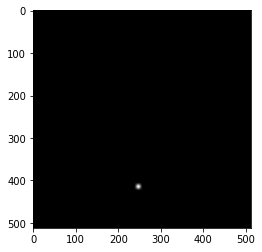

In [10]:
plt.imshow(heatmap[0][6], cmap='gray')

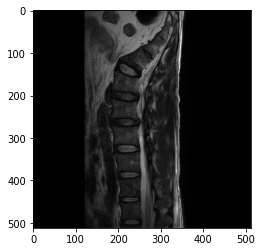

In [11]:
plt.imshow(MR[0][6], cmap='gray')

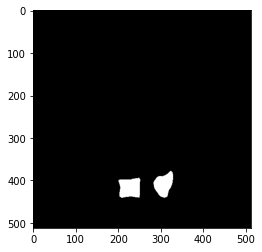

In [12]:
plt.imshow(Mask[0][7], cmap='gray')

In [13]:
if D > 12:
    start = random.choice([i for i in range(D - 12 + 1)])
    MR = crop(MR, start=start, end=start + 12, axis='z')
    heatmap = crop(heatmap, start=start, end=start + 12, axis='z')
    Mask = crop(Mask, start=start, end=start + 12, axis='z')

MR = crop_to_center(MR, list_landmarks[index], dsize=(12, 160, 224))
heatmap = crop_to_center(heatmap, list_landmarks[index], dsize=(12, 160, 224))
Mask = crop_to_center(Mask, list_landmarks[index], dsize=(12, 160, 224))

img = [np.concatenate((MR, heatmap)), Mask]

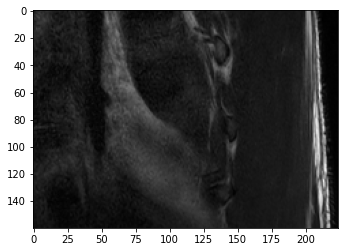

In [14]:
plt.imshow(MR[0][10], cmap='gray')

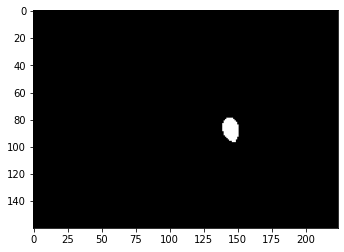

In [15]:
plt.imshow(Mask[0][10], cmap='gray')

In [16]:
img = train_transform(img)

img[0].shape

torch.Size([2, 12, 160, 224])

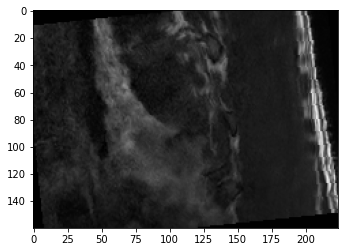

In [17]:
plt.imshow(img[0][0][10], cmap='gray')

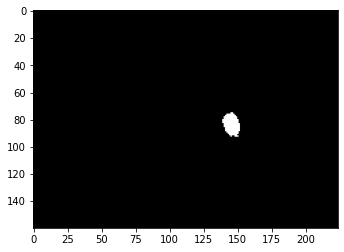

In [18]:
plt.imshow(img[1][0][10], cmap='gray')